# Preprocessing Datasets for Machine Learning
## Introduction
In practice, the data acquired for real world problems are often incomplete, noisy, and inconsistent. A few percentage of non-clean data points may effect the final performance by a few percentage drop. If a few steps of preprocessing were taken in the right direction, then better results would be easily achievable. A good data preprocessing is a necessary step for good machine learning performance and it is widely accepted that preprocessing takes the bulk of the overall machine learning effort.

In addition to data "cleaning", certain algorithms require data features properties in certain ways, such as **normalized** and **standardized** to make the method work better. For example clustering approaches by distance measures require data features to be normalized. The following procedures are common steps in preprocessing:
* Data formatting, cleaning
* Discretization, one-hot encoding
* Data integration and transformation
* Data reduction

## Data Formatting and Cleaning
Machine learning frameworks, such as `pandas`, `scikit-learn`, `Weka`, expect dataset files to be in certain formats to be able to process them. The Comma Separated Values __CSV__ is one of the most common file formats. When examining datasets sometimes we see the files might contain artifacts:

* single quotes in double quotes, i.e. `"Cote d'Azor"` or reversed? e.g. `'Cote d'Azor'`
* single quotes to differentiate between strings and values. i.e. `'1'` or `1`
* use of semicolon instead of commas e.g. `1;50;red;` in a row

In addition to the data formats artifacts, we might also see:

* duplicates of data lines (why is this undesired?)
* missing values (marked as `'?'` in Weka or `'NaN'` in pandas for numerical variables)
* incorrect entries (e.g. clerical errors)

Note that framework programs such as Weka learners are mature and strong enough to work with these problems without us cleaning them with a preprocessing stage. However, if we do the preprocessing ourselves, then we always increase the **quality of the dataset** and this helps the next stages of machine learning pipeline.

---

## Worked Example
Consider the breast cancer dataset file located at the module page, named module03_breast_cancer.csv. Load it with pandas library and check for (1.) duplicates, (2.) missing values, (3.) incorrect entries. In the following cells, for each problem that the dataset has, a correction is provided once the situation is determined.

In [1]:
# Standard libraries we always include
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(style="ticks", color_codes=True)

# Locate and load the data file
df = pd.read_csv('datasets/module03_breast_cancer.csv')
print(f'#rows={len(df)} #columns={len(df.columns)}')

# Print some info and plots to have a feeling about the dataset
print(df.dtypes)

#rows=298 #columns=10
age            float64
menopause       object
tumor-size     float64
inv-nodes      float64
node-caps       object
deg-malig        int64
breast          object
breast-quad     object
irradiat        object
recurrence      object
dtype: object


In [2]:
df.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,recurrence
0,44.0,premeno,21.0,2.0,no,2,right,left_up,no,no-recurrence-events
1,46.0,premeno,22.0,3.0,yes,3,right,left_up,no,recurrence-events
2,46.0,premeno,22.0,3.0,yes,3,right,left_up,no,recurrence-events
3,46.0,premeno,22.0,3.0,yes,3,right,left_up,no,recurrence-events
4,46.0,premeno,22.0,3.0,yes,3,right,left_up,no,recurrence-events


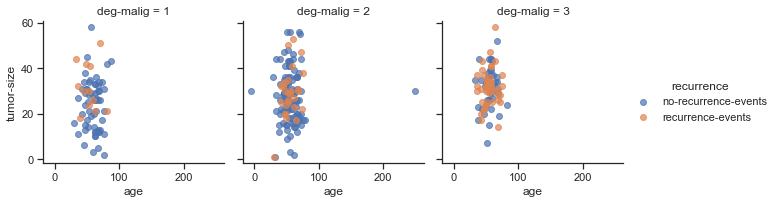

In [3]:
def plot_bc(_df):  # Make sure use a '_variable' name to avoid shadowing variables in other cells
    g = sns.FacetGrid(_df, col='deg-malig', hue='recurrence')
    g.map(plt.scatter, 'age', 'tumor-size', alpha=.7)
    g.add_legend()
    plt.show()
#
plot_bc(df)

**Observe:** In the second plot what is that data point at age 250?? ...Hmmm.

## Duplicates

Let's check duplicate values in our dataset.

In [4]:
# Check for duplicates, this adds a new column to the dataset
df["is_duplicate"]= df.duplicated()

# Note that when using f-strings, the internal quote character must be different, such as 'is_duplicate' above
print(f"#total= {len(df)}")
print(f"#duplicated= {len(df[df['is_duplicate']==True])}")

#total= 298
#duplicated= 5


In [5]:
# Print rows which have True in column 'is_duplicate'
df[df['is_duplicate']==True]

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,recurrence,is_duplicate
2,46.0,premeno,22.0,3.0,yes,3,right,left_up,no,recurrence-events,True
3,46.0,premeno,22.0,3.0,yes,3,right,left_up,no,recurrence-events,True
4,46.0,premeno,22.0,3.0,yes,3,right,left_up,no,recurrence-events,True
12,61.0,premeno,29.0,5.0,no,2,right,left_up,yes,no-recurrence-events,True
13,61.0,premeno,29.0,5.0,no,2,right,left_up,yes,no-recurrence-events,True


In [6]:
# Drop the duplicate rows using index - best way to drop in pandas
index_to_drop = df[df['is_duplicate']==True].index
df.drop(index_to_drop, inplace=True)

# Remove the duplicate marker column
df.drop(columns='is_duplicate', inplace=True)
print(f'#total= {len(df)}')

#total= 293


**Observe:** Total number of rows (data points) reduced to 293

## Missing values

Let's impute missing values. If we do not handle missing values, then most of the times the ML algorithms will handle them internally.

The safest and most common approach: Use __mean__ (or equally acceptable __median__) for numerical values; and __mode__ for nominal values to __impute__ missing values.

Mean: $\bar{x}=\frac{1}{N} \sum_{i=1}^{N} x_{i}$  
Median: $\tilde{x}=\frac{x[|x| / 2]+x[|x| / 2+1]}{2}$  
Mode: $\hat{x}=\underset{x}{\operatorname{argmax}} f(x)$

In [7]:
# Do we have NaN in our dataset?
df.isnull().any()

age             True
menopause      False
tumor-size      True
inv-nodes       True
node-caps      False
deg-malig      False
breast         False
breast-quad    False
irradiat       False
recurrence     False
dtype: bool

In [8]:
# We do have NaN - three numerical variables - check first cell, it says float 64
display(df[df['age'].isnull()])
display(df[df['tumor-size'].isnull()])
display(df[df['inv-nodes'].isnull()])

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,recurrence
25,NaN,ge40,34.0,1.0,no,1,right,central,no,no-recurrence-events
26,NaN,ge40,28.0,1.0,no,2,right,left_up,no,no-recurrence-events


,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,recurrence
27,52.0,premeno,NaN,3.0,no,2,left,left_low,yes,recurrence-events
28,37.0,premeno,NaN,2.0,no,3,left,central,no,no-recurrence-events


,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,recurrence
29,62.0,premeno,10.0,NaN,no,1,right,left_up,no,no-recurrence-events


In [9]:
# Mean values of columns
print(f"mean-age= {np.mean(df['age'])}")
print(f"mean-tumor-size= {np.mean(df['tumor-size'])}")
print(f"mean-inv-nodes= {np.mean(df['inv-nodes'])}")

# Impute
df['age'] = df['age'].fillna(df['age'].mean())
df['tumor-size'] = df['tumor-size'].fillna(df['tumor-size'].mean())
df['inv-nodes'] = df['inv-nodes'].fillna(df['inv-nodes'].mean())

# Check with the previous cell results
display(df.loc[[24,25,26,27,28]])

mean-age= 56.261168384879724
mean-tumor-size= 28.343642611683848
mean-inv-nodes= 3.5753424657534247


,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,recurrence
24,62.000000,premeno,10.000000,6.0,no,1,right,left_up,no,no-recurrence-events
25,56.261168,ge40,34.000000,1.0,no,1,right,central,no,no-recurrence-events
26,56.261168,ge40,28.000000,1.0,no,2,right,left_up,no,no-recurrence-events
27,52.000000,premeno,28.343643,3.0,no,2,left,left_low,yes,recurrence-events
28,37.000000,premeno,28.343643,2.0,no,3,left,central,no,no-recurrence-events


## Missing nominal values

Finding missing values in nominal variables is more tricky. First let's look at the nominal variables and then see what kind of unique values these nominal variables take. i.e. this is the level of the nominal variable drawn from a finite alphabet. Unless a numerical type (int64, float64, etc) df.dtype will correspond to an object which is a np.object class after read into from a CSV file.

In [10]:
# What are the column types?
df.dtypes

age            float64
menopause       object
tumor-size     float64
inv-nodes      float64
node-caps       object
deg-malig        int64
breast          object
breast-quad     object
irradiat        object
recurrence      object
dtype: object

In [11]:
# Check unique levels and see any marker is used for a missing level
for col in df.columns:
    if df[col].dtype == np.object:
        print(col, df[col].unique())

menopause ['premeno' 'ge40' 'lt40']
node-caps ['no' 'yes' '?']
breast ['right' 'left']
breast-quad ['left_up' 'central' 'left_low' 'right_up' 'right_low' '?']
irradiat ['no' 'yes']
recurrence ['no-recurrence-events' 'recurrence-events']


The variables node-caps and breast-quad has '?' levels which need to be imputed with values to help the preprocessing.

In [12]:
# Check the next feature
display(df['node-caps'].value_counts())
print('mode-node-caps', df['node-caps'].value_counts().index[0])

no     227
yes     56
?       10
Name: node-caps, dtype: int64

mode-node-caps no


In [13]:
# Check the next feature
display(df['breast-quad'].value_counts())
print('mode-breast-quad', df['breast-quad'].value_counts().index[0])

left_low     111
left_up       99
right_up      33
right_low     26
central       23
?              1
Name: breast-quad, dtype: int64

mode-breast-quad left_low


In [14]:
# Replace '?' with mode - value/level with highest frequency in the feature
df['node-caps'] = df['node-caps'].replace({'?':'no'})
df['breast-quad'] = df['breast-quad'].replace({'?':'left_low'})

In [15]:
# Again, check unique levels and see any marker is used or left out for a missing level
for col in df.columns:
    if df[col].dtype == np.object:
        print (col, df[col].unique())

menopause ['premeno' 'ge40' 'lt40']
node-caps ['no' 'yes']
breast ['right' 'left']
breast-quad ['left_up' 'central' 'left_low' 'right_up' 'right_low']
irradiat ['no' 'yes']
recurrence ['no-recurrence-events' 'recurrence-events']


## Incorrect entries
Remember the age value `250` from previous cells?

Finding out incorrect entries is more difficult than the previous steps as incorrect entries truly depend on the data column and **domain knowledge.** For this step we will look at the plots of numerical columns and figure out possible incorrect entries. Also Subject Matter Experts (SME) would help greatly in real-world projects about incorrect entries.

Note that incorrect entries may not be corrected easily and sometimes the best might be to drop that data point.

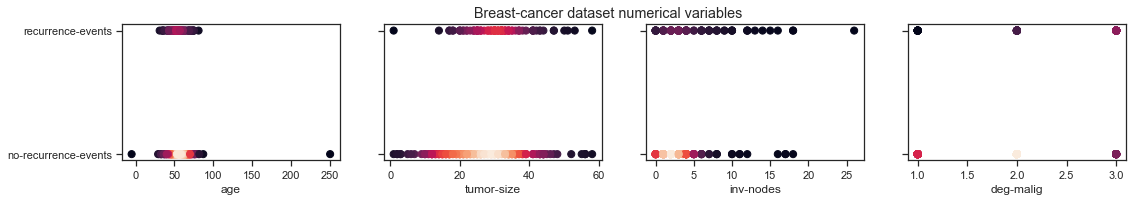

In [16]:
# Let's use kernel density estimation to color the density
from scipy.stats import gaussian_kde

# We will reuse this plotting function later
def plot_bc_numericals(_df):
    fig, axs = plt.subplots(1, 4, figsize=(18, 2.5), sharey=True)
    y = df['recurrence'].astype('category').cat.codes.ravel()
    xy = np.vstack([_df['age'],y]); z = gaussian_kde(xy)(xy)
    axs[0].scatter(_df['age'], _df['recurrence'], c=z, s=50, edgecolor=None)
    axs[0].set_xlabel('age')
    xy = np.vstack([_df['tumor-size'],y]); z = gaussian_kde(xy)(xy)
    axs[1].scatter(_df['tumor-size'], _df['recurrence'], c=z, s=50, edgecolor=None)
    axs[1].set_xlabel('tumor-size')
    xy = np.vstack([_df['inv-nodes'],y]); z = gaussian_kde(xy)(xy)
    axs[2].scatter(_df['inv-nodes'], _df['recurrence'], c=z, s=50, edgecolor=None)
    axs[2].set_xlabel('inv-nodes')
    xy = np.vstack([_df['deg-malig'],y]); z = gaussian_kde(xy)(xy)
    axs[3].scatter(_df['deg-malig'], _df['recurrence'], c=z, s=50, edgecolor=None)
    axs[3].set_xlabel('deg-malig')
    fig.suptitle('Breast-cancer dataset numerical variables')
    plt.show()

plot_bc_numericals(df)

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,recurrence
10,250.0,premeno,30.0,3.0,no,2,left,right_low,yes,no-recurrence-events


#total= 291


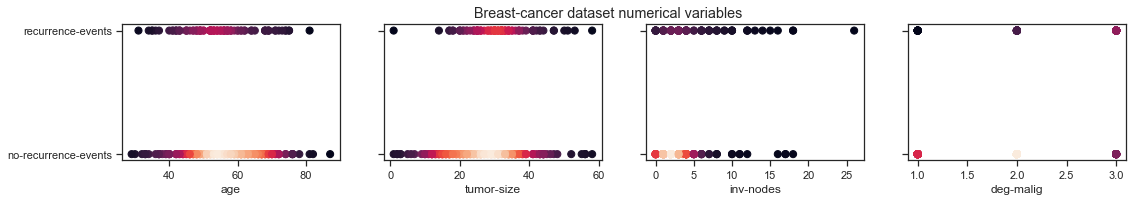

In [17]:
# Remove that line with the incorrect age=250 and age=-5
display(df[df['age']==250])
index_to_drop = df[df['age']==250].index
df.drop(index_to_drop, inplace=True)
index_to_drop = df[df['age']==-5].index
df.drop(index_to_drop, inplace=True)

# Check results
print(f'#total= {len(df)}')
plot_bc_numericals(df)

In [18]:
# Let's reset the indices to the dataframe after dropping a few rows
df = df.reset_index(drop=True)

## Cleaning complete

Compare the previous two cells to see the effect of removing the incorrect age entry.

At this point we are ready to apply some learners such as the Random Forest classifier.

# Discretization

Discretization is the process where a numerical variable is mapped to some levels by binning. This step is a big research/engineering area in machine learning. Recall that an example was provided in the past modules where the target (dependent) variable was discretized into three levels.

For our purposes, in this step, we will do the post-discretization, and apply one hot encoding to a nominal/discretized variable. Note that the variable might be a nominal variable naturally, such as the 'breast' variable which takes values from the alphabet {'left', 'right'}.

Now, we would like to continue preparing (preprocess) the dataset further to meet the requirements of the classifier that we would like to use - Random Forest classifier from scikit-learn library. This classifier works only on numerical data, thus we will convert the nominal variables into one hot encoded numerical variables, as explained in previous modules.

In [19]:
# pandas get_dummies function is the one-hot-encoder
def encode_onehot(_df, f):
    _df2 = pd.get_dummies(_df[f], prefix='', prefix_sep='').max(level=0, axis=1).add_prefix(f+' - ')
    df3 = pd.concat([_df, _df2], axis=1)
    df3 = df3.drop([f], axis=1)
    return df3

# Print nominal variables
for f in list(df.columns.values):
    if df[f].dtype == np.object:
        print(f) 

menopause
node-caps
breast
breast-quad
irradiat
recurrence


Question: Will we one-hot-encode the variable 'recurrence'?

In [20]:
# Display the original
display(df['menopause'][:10])

# Apply the onehot-encoding method
df_o = encode_onehot(df, 'menopause')

# Check the onehot-encoded version of this feature
cols = []
for f in list(df_o.columns.values):
    if 'menopause' in f:
        cols += [f]

0    premeno
1    premeno
2       ge40
3       ge40
4    premeno
5    premeno
6    premeno
7       ge40
8    premeno
9    premeno
Name: menopause, dtype: object

In [21]:
# Display the onehot-encoded        
display(df_o[cols][:10])

,menopause - ge40,menopause - lt40,menopause - premeno
0,0,0,1
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
5,0,0,1
6,0,0,1
7,1,0,0
8,0,0,1
9,0,0,1


In [22]:
# Apply the rest of the nominal features too
df_o = encode_onehot(df_o, 'node-caps')
df_o = encode_onehot(df_o, 'breast')
df_o = encode_onehot(df_o, 'breast-quad')
df_o = encode_onehot(df_o, 'irradiat')

In [23]:
# Let's check how many features we have
print(f'before={len(df.columns)}, after={len(df_o.columns)}')

before=10, after=19


In [24]:
df_o.head()

,age,tumor-size,inv-nodes,deg-malig,recurrence,menopause - ge40,menopause - lt40,menopause - premeno,node-caps - no,node-caps - yes,breast - left,breast - right,breast-quad - central,breast-quad - left_low,breast-quad - left_up,breast-quad - right_low,breast-quad - right_up,irradiat - no,irradiat - yes
0,44.0,21.0,2.0,2,no-recurrence-events,0,0,1,1,0,0,1,0,0,1,0,0,1,0
1,46.0,22.0,3.0,3,recurrence-events,0,0,1,0,1,0,1,0,0,1,0,0,1,0
2,56.0,19.0,4.0,1,no-recurrence-events,1,0,0,1,0,0,1,1,0,0,0,0,1,0
3,58.0,41.0,0.0,2,recurrence-events,1,0,0,1,0,1,0,0,1,0,0,0,1,0
4,53.0,36.0,0.0,3,no-recurrence-events,0,0,1,0,1,0,1,0,1,0,0,0,0,1


Next, let's classify the preprocessed dataset using the following strategies:

* 80% random test-train split
* Leave-one-out
* 10-fold cross validation
* Stratified 10-fold cross validation

Note that the target variable is binary, predicting when the cancer is recurred, or the cancer did not recur. Clearly this dataset has ground truth captured from the data source, or in other words, dataset is pre-labeled, or carry the ground truth. Thus we will employ **supervised learning**.

**Important:** Do not forget to remove the target (predicted, dependent) variable from X. Remember the Dataframe we are working already has the target variable and we will move it to y vector.

In [25]:
# Show that the dependent variable is unbalanced
display(df['recurrence'].value_counts())

no-recurrence-events    205
recurrence-events        86
Name: recurrence, dtype: int64

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split

# We will reuse the classifier function below
def rf_train_test(_X_tr, _X_ts, _y_tr, _y_ts):
    # Create a new random forest classifier, with working 4 parallel cores
    rf = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=None, n_jobs=4)
    # Train on training data
    model = rf.fit(_X_tr, _y_tr)
    # Test on training data
    y_pred = rf.predict(_X_ts)
    # Return accuracy
    return accuracy_score(_y_ts, y_pred)

In [27]:
# Prepare the input X matrix and target y vector
X = df_o.loc[:, df_o.columns != 'recurrence'].values
y = df_o.loc[:, df_o.columns == 'recurrence'].values.ravel()

In [28]:
# Sanity check
print(y[:10])

['no-recurrence-events' 'recurrence-events' 'no-recurrence-events'
 'recurrence-events' 'no-recurrence-events' 'recurrence-events'
 'no-recurrence-events' 'no-recurrence-events' 'no-recurrence-events'
 'no-recurrence-events']


In [29]:
# 80% split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=None)
rf_train_test(X_train, X_test, y_train, y_test)

0.7627118644067796

**Question:** What will be the performance (accuracy) when we run the above cell again? Will you see any variations?

In [30]:
# Run 10 times
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=None)
    print(rf_train_test(X_train, X_test, y_train, y_test))

0.711864406779661
0.7457627118644068
0.7796610169491526
0.7288135593220338
0.7966101694915254
0.7457627118644068
0.7966101694915254
0.7288135593220338
0.6779661016949152
0.711864406779661


**Important:** As the training and testing partition changes, the performance follows respectively.



**Question:** How can we measure the performance so that we can be sure of reporting it right?



In [31]:
%%time
# Run 100 times and collect statistics
accuracies = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=None)
    accuracies += [rf_train_test(X_train, X_test, y_train, y_test)]
#
print(f'80% train-test split accuracy is {np.mean(accuracies):.3f} {chr(177)}{np.std(accuracies):.4f}')

80% train-test split accuracy is 0.737 ±0.0544
CPU times: user 25.8 s, sys: 4.98 s, total: 30.8 s
Wall time: 38.6 s


**Note:** Leave-one-out evaluation keeps a single data point and label for test and uses all except for the test vector for training. Then, the evaluation process repeats this for each of the remaining data points, having a total number of  𝑁  accuracies.

The sklearn API says train and test require a 2D X and 1D y even when there is only one data point. Below code generates the test vectors properly.

In [32]:
%%time
# Leave one out testing - this takes relatively longer
N = X.shape[0]
accuracies = []
for i in range (0,N):
    # Keep the 2D vector for the single test data point X
    X_test = X[i].reshape(1, -1)
    X_train = np.delete(np.array(X, copy=True), i, axis=0)
    # Keep the 1D vector for the single test label y
    y_test = [y[i]]
    y_train = np.delete(np.array(y, copy=True), i, axis=0)
    accuracies += [rf_train_test(X_train, X_test, y_train, y_test)]
#
# Sanity
print(f'Leave-one-out accuracy N= {N}, #accuracies= {len(accuracies)}')
# Score
print(f'Leave-one-out accuracy is {np.mean(accuracies):.3f} {chr(177)}{np.std(accuracies):.4f}')

Leave-one-out accuracy N= 291, #accuracies= 291
Leave-one-out accuracy is 0.735 ±0.4411
CPU times: user 1min 16s, sys: 14.6 s, total: 1min 31s
Wall time: 1min 52s


In [33]:
%%time
# 10-fold cross validation
accuracies = []
kf = KFold(n_splits=10,shuffle=False,random_state=None)
for train_index, test_index in kf.split(X, y):
    acc = rf_train_test(X[train_index], X[test_index], y[train_index], y[test_index])
    accuracies += [acc]
#
print(f'10-fold cross validation accuracy is {np.mean(accuracies):.3f} {chr(177)}{np.std(accuracies):.4f}')

10-fold cross validation accuracy is 0.739 ±0.0682
CPU times: user 2.74 s, sys: 534 ms, total: 3.27 s
Wall time: 3.86 s


In [34]:
%%time
def eval_classifier(X, y, niter):
    accuracies = []
    kf = StratifiedKFold(n_splits=10,shuffle=False,random_state=None)
    for train_index, test_index in kf.split(X, y):
        acc = rf_train_test(X[train_index], X[test_index], y[train_index], y[test_index])
        accuracies += [acc]
    print( (f'Stratified 10-fold cross validation accuracy is '
            f'{np.mean(accuracies):.3f} {chr(177)}{np.std(accuracies):.4f} with {niter} total iterations')
         )
#
eval_classifier(X, y, 100)

Stratified 10-fold cross validation accuracy is 0.721 ±0.0505 with 100 total iterations
CPU times: user 2.65 s, sys: 522 ms, total: 3.17 s
Wall time: 3.83 s


Note the above performance results for discussion in the following cells.



**Question:** What are the differences between these four evaluation methods?

## Data Transformation

Now that we preprocessed and used the data for classification we can move to other interesting problems.

Imagine, we did not have the ground truth, so that a supervised learning was not possible. A natural approach in this case is clustering the data to see if there are some patterns or models we can come up with that explains the cancer behavior. We will attempt answering questions like "Is there a direct relation between menopause and cancer?"

First, let's draw some plots where the x, y and z-dimensions are 'age', 'tumor-size', 'inv-nodes' and color is 'recurrence'.

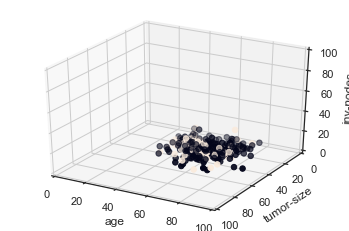

In [35]:
from mpl_toolkits.mplot3d import Axes3D

# Deep copy original dataframe
df2 = df.copy()

# Convert every feature to numbers
df2['recurrence'] = df['recurrence'].astype("category").cat.codes

df2['menopause'] = df['menopause'].astype("category").cat.codes.astype('float')
df2['node-caps'] = df['node-caps'].astype("category").cat.codes.astype('float')
df2['breast'] = df['breast'].astype("category").cat.codes.astype('float')
df2['breast-quad'] = df['breast-quad'].astype("category").cat.codes.astype('float')
df2['irradiat'] = df['irradiat'].astype("category").cat.codes.astype('float')

df2['deg-malig'] = df['deg-malig'].astype('float')

def draw3d(df, _mn, _mx):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlim3d(_mn, _mx)
    ax.set_ylim3d(_mn, _mx)
    ax.set_zlim3d(_mn, _mx)
    ax.set_ylim(ax.get_ylim()[::-1]) 
    ax.scatter(df['age'], df['tumor-size'], df['inv-nodes'], c=df['recurrence'], s=30)
    ax.set_xlabel('age'); ax.set_ylabel('tumor-size'); ax.set_zlabel('inv-nodes')
#
draw3d(df2, 0, 100)

Question: Do the dimensions 'age', 'tumor-size', 'inv-nodes' look fine in the above 3D plot?

Answer: The features are clumped and not nicely occupy  [0−100]  range, i.e. we are not seeing a spherical cluster shape.

---

Let's cluster the cancer data, without using the ground truth. We have to convert the nominal variables to numerical by using the category codes like we applied to 'recurrence' variable.

Important: Make sure every variable is of the same type, e.g. float32.

Important: Note that the values 'recurrence' took {0,1}, and by looking at the 3d plot above, can we easily find out which values (0 or 1) corresponds to 'recurrence-events' levels?

In [36]:
from sklearn.cluster import KMeans

def kmeans(_X, _y, niter):  # do it niter times to collect statistics
    accuracies = []
    for i in range(niter):
        # We know that there are two levels in tagret variable - thus n_clusters=2
        km = KMeans(n_clusters=2, random_state=None)
        clusters = km.fit_predict(_X)
        accuracies += [accuracy_score(_y, clusters)]
    #
    return np.mean(accuracies)

X = df2.loc[:, df2.columns != 'recurrence'].values
y = df2.loc[:, df2.columns == 'recurrence'].values.ravel()

print(f'Clustering error= {kmeans(X, y, 100):.3f}')

Clustering error= 0.497


Above performance is not very good as the error is almost equivalent to random choice, which would be  12  since we have 2 classes.

## Normalization and Standardization
Mapping the values of a column to [0,1] range is normalization:  normalization: $\frac{x_{i}-\min (x)}{\max (x)-\min (x)}$

Standardization is mapping the values to a  0 -mean  1 -standard-deviation distribution: $\frac{x_{i}-\operatorname{mean}(x)}{\operatorname{stdev}(x)}$

Normalization makes the __optimization surface__ more __spherical__, which helps the optimizer using each feature with equal importance. This is especially important and helping for __distance__ based approaches.

Let's try two scalers from `sklearn.preprocessing` 1.Normalization MinMaxScaler(), 2. Standardization `scale()`

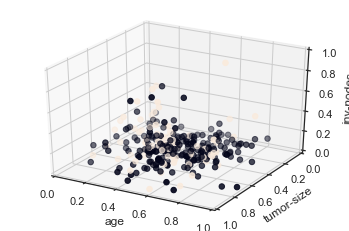

In [37]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
df2[['age', 'tumor-size', 'inv-nodes']] = min_max_scaler.fit_transform(df2[['age', 'tumor-size', 'inv-nodes']])

draw3d(df2, 0, 1)

By normalizing the values through expansion and contraction to [0,1] we achieve the __distance__ between the data points are in the same "range" or unit. Thus the distance metrics like Euclidean distance will weigh each __dimension__ or feature __equally__.

__Example:__ Imagine a dataset which has speed in miles [0,100] and time traveled in seconds [0,43200] (12 hours max). A proper approach would be mapping both features into [0,1] scale to treat the feature space spherically. For actual feature values an inverse transformation can be used to map back to the original units (for example to be presented to user).

A distance metric $d$ in *$M$* dimensions (`Dataframe` has M number of columns) such as Euclidean $d_{i k}=\sqrt{\sum_{j=0}^{M}\left(x_{i j}-x_{k j}\right)^{2}}$

As an example, clustering algorithms use some form of distance metric such as Euclidean distance between pairs of data points.

As can be seen from above example, normalization of variables is a necessary step for clustering.

In [38]:
df2[['deg-malig', 'breast-quad']] = min_max_scaler.fit_transform(df2[['deg-malig', 'breast-quad']])

X = df2.loc[:, df2.columns != 'recurrence'].values
y = df2.loc[:, df2.columns == 'recurrence'].values.ravel()

print(f'Clustering error= {kmeans(X, y, 100):.3f}')

Clustering error= 0.499


And now standardization.



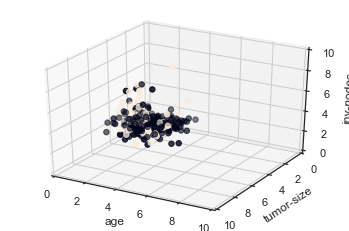

In [39]:
df2[['age', 'tumor-size', 'inv-nodes']] = preprocessing.scale(df2[['age', 'tumor-size', 'inv-nodes']])

draw3d(df2, 0, 10)

In [40]:
df2.head()


,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,recurrence
0,-1.085619,2.0,-0.676527,-0.42551,0.0,0.5,1.0,0.50,0.0,0
1,-0.901708,2.0,-0.584259,-0.15608,1.0,1.0,1.0,0.50,0.0,1
2,0.017847,0.0,-0.861061,0.11335,0.0,0.0,1.0,0.00,0.0,0
3,0.201758,0.0,1.168816,-0.96437,0.0,0.5,0.0,0.25,0.0,1
4,-0.258020,2.0,0.707481,-0.96437,1.0,1.0,1.0,0.25,1.0,0


In [41]:
df2[['deg-malig', 'breast-quad']] = preprocessing.scale(df2[['deg-malig', 'breast-quad']])

X = df2.loc[:, df2.columns != 'recurrence'].values
y = df2.loc[:, df2.columns == 'recurrence'].values.ravel()

print(f'Clustering error= {kmeans(X, y, 100):.3f}')

Clustering error= 0.498


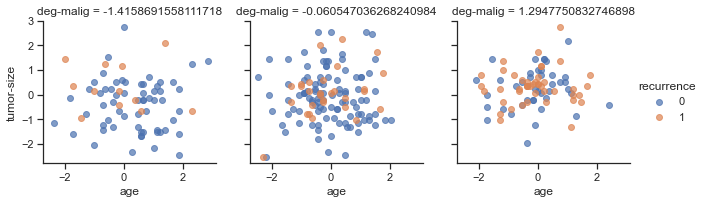

In [42]:
# Scaled
plot_bc(df2)

**Question:** Do you see any difference/improvement on the variables compared to the first set of plots in cell 1, repeated below?

**Answer:** Shapes are same but axis scales are different.

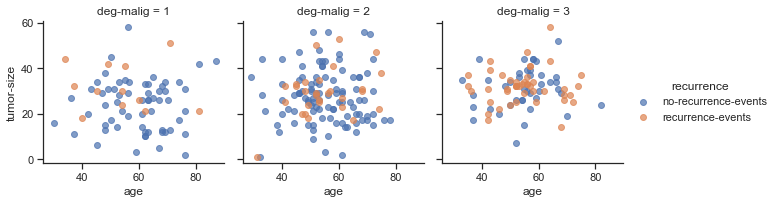

In [43]:
# Original
plot_bc(df)

Note that after variable transformation, variables become more spherical or Gaussian like, but then the levels or data points do not correspond to any meaningful value in the domain knowledge that the dataset originally belonged to. For example 'deg-malig' had three levels {1, 2, 3} which probably meant something to the doctors dealing with cancer patients. However depending on the dataset, such transformations make a difference, albeit a few percentage improvement on the performance.

## Data Reduction
Reducing the data helps in a few ways:

* Faster method run-time, such as training
* More generalized models, decreases overfitting
* Simpler models that make more sense to the domain expert or Subject Matter Expert (SME)
* In some cases better accuracy performance - not necessarily always happens

**Feature ranking** and **feature selection** is a common stage that is executed after cleaning and preprocessing the data. In the following cells we will examine the variable rankings by **Univariate Feature Selection**.

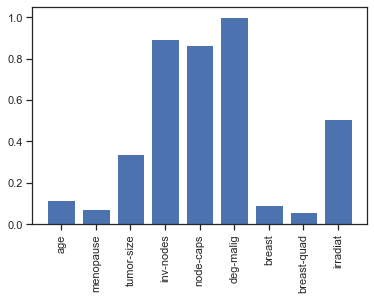

In [44]:
from sklearn.feature_selection import SelectPercentile, f_classif


selector = SelectPercentile(f_classif, percentile=10)
# Fit the data
selector.fit(X, y)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()

# Display
cols = list(df2.loc[:, df2.columns != 'recurrence'].columns.values)
y_pos = np.arange(len(cols))
plt.bar(y_pos, scores)
plt.xticks(y_pos, cols, rotation=90)
plt.show()

Question: Can we drop `'age'`, `'menopause'`, `'breast'`, `'breast-quad'` variables and redo the classification evaluation without a performance loss?

In [45]:
df3 = df2.copy()
df3.drop(columns='age', inplace=True)
df3.drop(columns='menopause', inplace=True)
df3.drop(columns='breast', inplace=True)
df3.drop(columns='breast-quad', inplace=True)

X = df3.loc[:, df3.columns != 'recurrence'].values
y = df3.loc[:, df3.columns == 'recurrence'].values.ravel()

In [46]:
eval_classifier(X, y, 100)

Stratified 10-fold cross validation accuracy is 0.742 ±0.0661 with 100 total iterations


`Wow!` The performance accuracy did not drop. And we have less data columns now.

Note that we had standardized the data in the previous steps. Let's go back to the original dataset just after the cleaning was completed.

In [47]:
df4 = df_o.copy()
df4.drop(columns='age', inplace=True)

# 'menopause' was onehot-encoded
for col in df4.columns.values:
    if 'menopause' in col:
        df4.drop(columns=col, inplace=True)

# 'breast' was onehot-encoded
for col in df4.columns.values:
    if 'breast' in col:
        df4.drop(columns=col, inplace=True)

# 'breast-quad' was onehot-encoded
for col in df4.columns.values:
    if 'breast-quad' in col:
        df4.drop(columns=col, inplace=True)

X = df4.loc[:, df4.columns != 'recurrence'].values
y = df4.loc[:, df4.columns == 'recurrence'].values.ravel()

In [48]:
eval_classifier(X, y, 100)

Stratified 10-fold cross validation accuracy is 0.735 ±0.0493 with 100 total iterations


**More success!** The performance accuracy increased! Or did we bias it?

**Harder Question:** Do you accept the performance increase as a valid increase? Or would you attribute it to the variance of error?



---

**Question:** What is the most important take-away in this effort